In [1]:
# import required modules
import numpy as np
import pandas as pd
from collections import Counter
import statistics

import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# import data
allFactors = pd.read_csv('/scratch1/qiushipe/data_reusability/data_tables/Metadata_Matrix_raw.csv', low_memory = False)
allFactors.head()

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess
0,PMC6279764,SRP073810,GSE80651,GEO,2018-12-04,2016-10-24,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN
1,PMC8633104,SRP093349,GSE89843,GEO,2021-11-12,2017-08-15,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN
2,PMC8542793,SRP010905,GSE35724,GEO,2021-10-11,2013-10-18,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN
3,PMC8542793,SRP029602,GSE50612,GEO,2021-10-11,2015-01-01,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN
4,PMC8542793,SRP029985,GSE50934,GEO,2021-10-11,2014-06-10,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN


In [3]:
# add a column with the total use count of each converted_accession ID
justAcc = allFactors.loc[:, ['pmc_ID', 'converted_accession']].drop_duplicates()
justAcc.head()

,pmc_ID,converted_accession
0,PMC6279764,GSE80651
1,PMC8633104,GSE89843
2,PMC8542793,GSE35724
3,PMC8542793,GSE50612
4,PMC8542793,GSE50934


In [4]:
# count reuse
rc = Counter(justAcc['converted_accession'])
reuse_counts = pd.DataFrame.from_dict(rc, orient = 'index').reset_index()
reuse_counts.columns = ['converted_accession', 'total_use_count']
reuse_counts.head()

,converted_accession,total_use_count
0,GSE80651,2
1,GSE89843,11
2,GSE35724,5
3,GSE50612,8
4,GSE50934,8


In [5]:
# merge reuse counts onto table
allFactors = pd.merge(allFactors, reuse_counts, how = 'left', on = 'converted_accession')
allFactors.head()

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,total_use_count
0,PMC6279764,SRP073810,GSE80651,GEO,2018-12-04,2016-10-24,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2
1,PMC8633104,SRP093349,GSE89843,GEO,2021-11-12,2017-08-15,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,11
2,PMC8542793,SRP010905,GSE35724,GEO,2021-10-11,2013-10-18,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,5
3,PMC8542793,SRP029602,GSE50612,GEO,2021-10-11,2015-01-01,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,8
4,PMC8542793,SRP029985,GSE50934,GEO,2021-10-11,2014-06-10,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,8


In [6]:
# normalize reuse count by amount of time public

# convert repository upload dates and today's date to datetime objects
allFactors.loc[:,'repository_date'] = allFactors['repository_date'].replace({' ':''})
allFactors.loc[:,'repository_date'] = pd.to_datetime(allFactors['repository_date'], format = '%Y-%m-%d')
allFactors['today'] = date.today().strftime('%Y-%m-%d')
allFactors['today'] = pd.to_datetime(allFactors['today'], format = '%Y-%m-%d')

# create timedelta objects representing amount of time public in YEARS
allFactors['time_public'] = allFactors['today'] - allFactors['repository_date']
allFactors['time_public'] = allFactors['time_public'].dt.days / 365

# normalize reuse count by years public
allFactors['reuse_count'] = (allFactors['total_use_count'] - 1)
allFactors['norm_reuse_count'] = allFactors['reuse_count'] / allFactors['time_public']
allFactors = allFactors.drop(labels = ['total_use_count'], axis = 1)
allFactors.head()

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count
0,PMC6279764,SRP073810,GSE80651,GEO,2018-12-04,2016-10-24,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.838356,1,0.171281
1,PMC8633104,SRP093349,GSE89843,GEO,2021-11-12,2017-08-15,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.030137,10,1.988017
2,PMC8542793,SRP010905,GSE35724,GEO,2021-10-11,2013-10-18,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,8.857534,4,0.451593
3,PMC8542793,SRP029602,GSE50612,GEO,2021-10-11,2015-01-01,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,7.652055,7,0.914787
4,PMC8542793,SRP029985,GSE50934,GEO,2021-10-11,2014-06-10,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,8.213699,7,0.852235


In [7]:
# Tag each paper as either a generator or a reuser

# take each converted accession along with the first date it appears in a paper
justPap = allFactors.loc[:, ['converted_accession', 'pmc_date']].drop_duplicates()
justPap = justPap.groupby('converted_accession', as_index = False).agg({'pmc_date': 'min'})
justPap = justPap.rename(columns = {'pmc_date':'min_pmc_date'})

# label all of the usages of these datasets on these dates with a 'G' (generators)
justPap.loc[:,'reuse_role'] = 'G'
justPap.head()

,converted_accession,min_pmc_date,reuse_role
0,DRP000009,2012-01-27,G
1,DRP000010,2010-04-27,G
2,DRP000017,2011-08-09,G
3,DRP000018,2011-08-09,G
4,DRP000019,2011-08-09,G


In [8]:
# merge these back onto the original table, matching dates back to papers
allFactors = pd.merge(allFactors, justPap, how = 'left', 
                      left_on = ['converted_accession', 'pmc_date'], 
                      right_on = ['converted_accession', 'min_pmc_date'])

# label every usage of a dataset that isn't 'G' (generator) as 'R' (reuser)
allFactors['allR'] = 'R'
allFactors['reuse_role'] = allFactors['reuse_role'].fillna(allFactors['allR'])

# drop redundant columns
allFactors = allFactors.drop(labels = ['min_pmc_date', 'allR'], axis = 1)

In [9]:
allFactors.head()

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role
0,PMC6279764,SRP073810,GSE80651,GEO,2018-12-04,2016-10-24,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.838356,1,0.171281,R
1,PMC8633104,SRP093349,GSE89843,GEO,2021-11-12,2017-08-15,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.030137,10,1.988017,R
2,PMC8542793,SRP010905,GSE35724,GEO,2021-10-11,2013-10-18,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,8.857534,4,0.451593,R
3,PMC8542793,SRP029602,GSE50612,GEO,2021-10-11,2015-01-01,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,7.652055,7,0.914787,R
4,PMC8542793,SRP029985,GSE50934,GEO,2021-10-11,2014-06-10,Mus musculus,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,8.213699,7,0.852235,R


### perform QC

In [10]:
# cut out whitespace
allFactors.loc[:,'pmc_date'] = allFactors['pmc_date'].replace({' ':''})

# take slice of what we need from allFactors
gens = allFactors.loc[allFactors['reuse_role'] == 'G', :]

In [11]:
gens

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role
26,PMC4830539,GSE60793,E-GEOD-60793,NaN,2016-04-13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-25,NaN,0,NaN,G
29,PMC4191404,GSE54454,E-GEOD-54454,NaN,2014-09-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-25,NaN,0,NaN,G
31,PMC6292174,SRR2992615,GSE75956,GEO,2018-12-13,2017-02-09,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.542466,0,0.000000,G
32,PMC6292174,SRR2992616,GSE75956,GEO,2018-12-13,2017-02-09,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.542466,0,0.000000,G
33,PMC6292174,SRR2992619,GSE75956,GEO,2018-12-13,2017-02-09,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,5.542466,0,0.000000,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353428,PMC6219076,SRP132165,SRP132165,SRA,2018-11-06,2018-03-29,Spodoptera frugiperda,Illumina HiSeq 2500,miRNA-Seq,20.0,1.721086e+09,public,2022-08-25,4.410959,0,0.000000,G
353429,PMC7066330,GSE143744,GSE143744,GEO,2020-02-20,2020-01-17,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,2.605479,0,0.000000,G
353430,PMC7066330,GSE143743,GSE143743,GEO,2020-02-20,2020-01-17,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,2.605479,1,0.383807,G
353431,PMC5714895,GSE101692,GSE101692,GEO,2017-11-30,2018-01-12,Glycine max,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,4.619178,0,0.000000,G


In [12]:
# convert to date objects
gens.loc[:,'pmc_date'] = pd.to_datetime(gens['pmc_date'], format = '%Y-%m-%d', errors = 'coerce')
gens.loc[:,'repository_date'] = pd.to_datetime(gens['repository_date'], format = '%Y-%m-%d')

/spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
# subtract columns of date objects, creating a column of timedelta objects
gens.loc[:,'pub_delay'] = gens['pmc_date'] - gens['repository_date']
gens = gens.dropna(subset = ['pub_delay'])

/spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [14]:
# convert timedeltas back to integers
gens.loc[:,'pub_delay'] = gens['pub_delay'].dt.days
gens = gens.sort_values(by = 'pub_delay', ascending = False)
gens

/spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role,pub_delay
118005,PMC8553153,GSE45,GSE45,GEO,2021-10-28,2002-06-27,Homo sapiens,NaN,NaN,NaN,NaN,NaN,2022-08-25,20.175342,0,0.000000,G,7063
120076,PMC8527884,GSE42,GSE42,GEO,2021-10-06,2002-07-22,Mus musculus,SAGE NlaIII,Expression_Array,NaN,NaN,NaN,2022-08-25,20.106849,0,0.000000,G,7016
311780,PMC7670042,GSE15,GSE15,GEO,2020-11-03,2002-01-03,Mus musculus,NaN,NaN,NaN,NaN,NaN,2022-08-25,20.654795,1,0.048415,G,6879
82577,PMC7733691,GDS46,GSE498,GEO,2020-12-13,2002-02-27,Mus musculus,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,2022-08-25,20.504110,1,0.048771,G,6864
256873,PMC8515845,GSE84,GSE84,GEO,2021-09-30,2003-01-03,Saccharum sp.,NaN,NaN,NaN,NaN,NaN,2022-08-25,19.654795,0,0.000000,G,6845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138785,PMC3406062,SRP002463,SRP002463,SRA,2012-07-26,2021-12-15,human metagenome,Illumina HiSeq 2500,AMPLICON,602.0,37103066.0,filtered,2022-08-25,0.693151,0,0.000000,G,-3429
111644,PMC3159013,GSE151716,GSE151716,GEO,2011-08-02,2021-04-15,Caenorhabditis elegans,NaN,NaN,NaN,NaN,NaN,2022-08-25,1.361644,0,0.000000,G,-3544
56838,PMC3014295,GSE157442,GSE157442,GEO,2010-11-30,2020-09-04,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,1.972603,0,0.000000,G,-3566
89580,PMC2874554,SRR000905,SRP000109,SRA,2010-04-13,2020-12-05,metagenome,AB 310 Genetic Analyzer,WGS,907.0,52869317.0,public,2022-08-25,1.720548,10,5.812102,G,-3889


/home1/qiushipe/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_delay', ylabel='Density'>

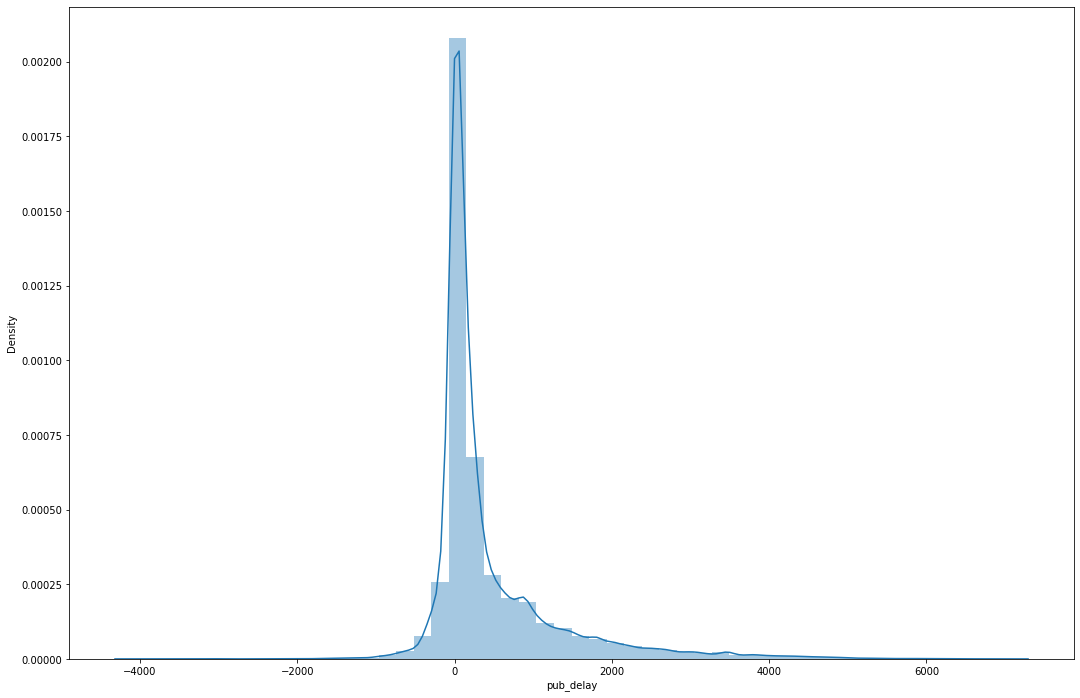

In [15]:
# plot timedelta distribution
fig_dims = (18,12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(gens['pub_delay'], ax = ax)

In [16]:
# select only papers in a reasonable timedelta window

DELAY_MIN = -270
DELAY_MAX = 270

gens_filtered = gens.loc[gens['pub_delay'] <= DELAY_MAX, :].loc[gens['pub_delay'] >= DELAY_MIN, :]
gens_filtered

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role,pub_delay
108999,PMC6161849,PRJNA376252,SRP100505,SRA,2018-09-28,2018-01-01,Hordeum vulgare,Illumina HiSeq 2500,RNA-Seq,302.0,1.166819e+10,public,2022-08-25,4.649315,1,0.215085,G,270
100795,PMC8090890,PRJNA564217,SRP220619,SRA,2020-12-23,2020-03-28,soil metagenome,Illumina MiSeq,AMPLICON,500.0,1.870777e+07,public,2022-08-25,2.410959,0,0.000000,G,270
109000,PMC6161849,SRR5279889,SRP100609,SRA,2018-09-28,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202.0,1.327575e+10,public,2022-08-25,4.649315,0,0.000000,G,270
88768,PMC5240201,SRR3397076,SRP073395,SRA,2017-01-17,2016-04-22,Homo sapiens,HiSeq X Ten,WGS,302.0,1.508561e+11,public,2022-08-25,6.345205,0,0.000000,G,270
108998,PMC6161849,PRJNA376485,SRP100609,SRA,2018-09-28,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202.0,1.327575e+10,public,2022-08-25,4.649315,0,0.000000,G,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122860,PMC6356802,PRJNA491238,SRP161835,SRA,2019-01-18,2019-10-15,Mus musculus,Complete Genomics,RNA-Seq,50.0,1.083783e+09,public,2022-08-25,2.863014,0,0.000000,G,-270
292654,PMC5010306,DRA004333,DRP003564,SRA,2016-07-08,2017-04-04,Malus domestica,Illumina Genome Analyzer IIx,WGS,152.0,4.462566e+10,public,2022-08-25,5.394521,0,0.000000,G,-270
332653,PMC4221675,SRX547883,SRP042065,SRA,2014-10-25,2015-07-22,Pimephales promelas,Illumina HiSeq 2000,RNA-Seq,202.0,1.212000e+09,public,2022-08-25,7.098630,0,0.000000,G,-270
298299,PMC3716903,DRA001039,DRP001081,SRA,2013-07-06,2014-04-02,Oryzias latipes,AB SOLiD System 3.0,WGS,35.0,1.387911e+07,public,2022-08-25,8.402740,0,0.000000,G,-270


In [17]:
# select random papers inside/outside threshold for QC analysis
import random

# gens_filtered are inside threshold already
# get papers outside threshold, but within 365 days

DELAY_EDGE = 365

gens_aboveThresh = gens.loc[gens['pub_delay'] >= DELAY_MAX, :].loc[gens['pub_delay'] <= DELAY_EDGE]
gens_aboveThresh = gens_aboveThresh.loc[gens_aboveThresh['repository'] == "GEO", :]
gens_belowThresh = gens.loc[gens['pub_delay'] <= DELAY_MIN, :].loc[gens['pub_delay'] >= -DELAY_EDGE]
gens_belowThresh = gens_belowThresh.loc[gens_belowThresh['repository'] == "GEO", :]
gens_insideThresh = gens_filtered.loc[gens_filtered['repository'] == "GEO", :]

num_papers = 50
half_papers = int(num_papers / 2)

# take random samples inside, above, and below threshold
rand_in = pd.DataFrame(random.sample(gens_insideThresh['pmc_ID'].tolist(), num_papers))
rand_in.columns = ['pmc_ID']
rand_ab = pd.DataFrame(random.sample(gens_aboveThresh['pmc_ID'].tolist(), half_papers))
rand_ab.columns = ['pmc_ID']
rand_be = pd.DataFrame(random.sample(gens_belowThresh['pmc_ID'].tolist(), half_papers))
rand_be.columns = ['pmc_ID']

# match accessions to papers to make manual work easier
r_in = pd.merge(rand_in, gens_insideThresh[['pmc_ID', 'accession']], on = 'pmc_ID', how = 'left').drop_duplicates()
r_in['real_introducer'] = np.NaN
r_ab = pd.merge(rand_ab, gens_aboveThresh[['pmc_ID', 'accession']], on = 'pmc_ID', how = 'left').drop_duplicates()
r_be = pd.merge(rand_be, gens_belowThresh[['pmc_ID', 'accession']], on = 'pmc_ID', how = 'left').drop_duplicates()
r_out = pd.concat([r_ab, r_be])
r_out['real_introducer'] = np.NaN

# save incomplete files to csv
r_in.to_csv('/scratch1/qiushipe/data_reusability/data_tables/randomIntroducers_INSIDE.csv', index = False)
r_out.to_csv('/scratch1/qiushipe/data_reusability/data_tables/randomIntroducers_OUTSIDE.csv', index = False)

In [19]:
# fill the column "real_introducer" manully, and rename the files "randomIntroducers_INSIDE_270days_filledin.csv" and "randomIntroducers_OUTSIDE_270days_filledin.csv"
# validate each of these randomly selected paper-dataset relationships

# import the manually produced data (now complete files)
rinf = pd.read_csv('/scratch1/qiushipe/data_reusability/data_tables/randomIntroducers_INSIDE_270days_filledin.csv').dropna()
routf = pd.read_csv('/scratch1/qiushipe/data_reusability/data_tables/randomIntroducers_OUTSIDE_270days_filledin.csv').dropna()

# create a true positive column
# true positive means PMC_ID == REAL_INTRODUCER
rinf['TP'] = np.where(rinf['pmc_ID'] == rinf['real_introducer'], True, False)
routf['TN'] = np.where(routf['pmc_ID'] != routf['real_introducer'], True, False)

# reduce the tables to just PMC_ID and TP/TN
rinf = rinf[['pmc_ID', 'TP']].drop_duplicates()
routf = routf[['pmc_ID', 'TN']].drop_duplicates()

tp = statistics.mean(rinf['TP'])
tn = statistics.mean(routf['TN'])

print('True Positive rate (inside threshold): ' + str(tp))
print('True Negative rate (outside threshold, inside year): ' + str(tn))

True Positive rate (inside threshold): 0.9583333333333334
True Negative rate (outside threshold, inside year): 0.1794871794871795


In [20]:
not_gens = allFactors.loc[allFactors['reuse_role'] != 'G', :]
filtered_matrix = pd.concat(objs = [gens_filtered, not_gens], ignore_index = True, sort = False)
filtered_matrix

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role,pub_delay
0,PMC6161849,PRJNA376252,SRP100505,SRA,2018-09-28 00:00:00,2018-01-01,Hordeum vulgare,Illumina HiSeq 2500,RNA-Seq,302.0,1.166819e+10,public,2022-08-25,4.649315,1,0.215085,G,270.0
1,PMC8090890,PRJNA564217,SRP220619,SRA,2020-12-23 00:00:00,2020-03-28,soil metagenome,Illumina MiSeq,AMPLICON,500.0,1.870777e+07,public,2022-08-25,2.410959,0,0.000000,G,270.0
2,PMC6161849,SRR5279889,SRP100609,SRA,2018-09-28 00:00:00,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202.0,1.327575e+10,public,2022-08-25,4.649315,0,0.000000,G,270.0
3,PMC5240201,SRR3397076,SRP073395,SRA,2017-01-17 00:00:00,2016-04-22,Homo sapiens,HiSeq X Ten,WGS,302.0,1.508561e+11,public,2022-08-25,6.345205,0,0.000000,G,270.0
4,PMC6161849,PRJNA376485,SRP100609,SRA,2018-09-28 00:00:00,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202.0,1.327575e+10,public,2022-08-25,4.649315,0,0.000000,G,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288209,PMC8435749,SRP128359,SRP128359,SRA,2021-08-30,2019-09-17,Suaeda aralocaspica,NextSeq 500,WGS,285.0,1.707052e+10,public,2022-08-25,2.939726,2,0.680336,R,NaN
288210,PMC8435749,PRJNA325861,SRP076752,SRA,2021-08-30,2017-06-19,Suaeda aralocaspica,Illumina HiSeq 2000,miRNA-Seq,100.0,4.271994e+08,public,2022-08-25,5.186301,1,0.192816,R,NaN
288211,PMC8360842,GSE81089,GSE81089,GEO,2021-02-12,2016-06-01,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,6.235616,34,5.452548,R,NaN
288212,PMC8360842,GSE37745,GSE37745,GEO,2021-02-12,2012-10-12,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,2022-08-25,9.873973,220,22.280799,R,NaN


In [21]:
lsc = Counter(filtered_matrix.loc[filtered_matrix['repository'] == "SRA", ]["library_strategy"])
lsc_df = pd.DataFrame.from_dict(lsc, orient = 'index').reset_index()
sraLS = list(lsc_df["index"])
sraLS.remove("RNA-Seq")
sraLS

['AMPLICON',
 'WGS',
 'OTHER',
 'miRNA-Seq',
 'WXS',
 'Bisulfite-Seq',
 'WGA',
 'MRE-Seq',
 'FL-cDNA',
 'ChIP-Seq',
 'RAD-Seq',
 'CLONE',
 'RIP-Seq',
 'ATAC-seq',
 'Targeted-Capture',
 'POOLCLONE',
 'other',
 'Hi-C',
 'WCS',
 'DNase-Hypersensitivity',
 'EST',
 'MNase-Seq',
 'MeDIP-Seq',
 'Tn-Seq',
 'MBD-Seq',
 'CTS',
 'Synthetic-Long-Read',
 'ncRNA-Seq',
 'SELEX',
 'ChIA-PET',
 'CLONEEND',
 'Tethered Chromatin Conformation Capture',
 'FINISHING']

In [22]:
# add a column for "class"... separating GEO/SRA distinction into:
# (1) GEO gene expression
# (2) RNA-seq (GEO and SRA)
# (3) SRA other omics technologies

key = {"repository": ["GEO", "GEO", "SRA"] + ["SRA"]*(len(sraLS)), 
       "library_strategy": ["Expression_Array", "RNA-Seq", "RNA-Seq"] + sraLS,
      "class": ["GEO_expr", "RNA-Seq", "RNA-Seq"] + ["SRA_other"]*(len(sraLS))}
key = pd.DataFrame(key)
key

,repository,library_strategy,class
0,GEO,Expression_Array,GEO_expr
1,GEO,RNA-Seq,RNA-Seq
2,SRA,RNA-Seq,RNA-Seq
3,SRA,AMPLICON,SRA_other
4,SRA,WGS,SRA_other
5,SRA,OTHER,SRA_other
6,SRA,miRNA-Seq,SRA_other
7,SRA,WXS,SRA_other
8,SRA,Bisulfite-Seq,SRA_other
9,SRA,WGA,SRA_other


In [23]:
filtered_matrix = pd.merge(filtered_matrix, key, how = 'left', on = ['repository', 'library_strategy'])
filtered_matrix

,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role,pub_delay,class
0,PMC6161849,PRJNA376252,SRP100505,SRA,2018-09-28 00:00:00,2018-01-01,Hordeum vulgare,Illumina HiSeq 2500,RNA-Seq,302.0,1.166819e+10,public,2022-08-25,4.649315,1,0.215085,G,270.0,RNA-Seq
1,PMC8090890,PRJNA564217,SRP220619,SRA,2020-12-23 00:00:00,2020-03-28,soil metagenome,Illumina MiSeq,AMPLICON,500.0,1.870777e+07,public,2022-08-25,2.410959,0,0.000000,G,270.0,SRA_other
2,PMC6161849,SRR5279889,SRP100609,SRA,2018-09-28 00:00:00,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202.0,1.327575e+10,public,2022-08-25,4.649315,0,0.000000,G,270.0,RNA-Seq
3,PMC5240201,SRR3397076,SRP073395,SRA,2017-01-17 00:00:00,2016-04-22,Homo sapiens,HiSeq X Ten,WGS,302.0,1.508561e+11,public,2022-08-25,6.345205,0,0.000000,G,270.0,SRA_other
4,PMC6161849,PRJNA376485,SRP100609,SRA,2018-09-28 00:00:00,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202.0,1.327575e+10,public,2022-08-25,4.649315,0,0.000000,G,270.0,RNA-Seq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288209,PMC8435749,SRP128359,SRP128359,SRA,2021-08-30,2019-09-17,Suaeda aralocaspica,NextSeq 500,WGS,285.0,1.707052e+10,public,2022-08-25,2.939726,2,0.680336,R,NaN,SRA_other
288210,PMC8435749,PRJNA325861,SRP076752,SRA,2021-08-30,2017-06-19,Suaeda aralocaspica,Illumina HiSeq 2000,miRNA-Seq,100.0,4.271994e+08,public,2022-08-25,5.186301,1,0.192816,R,NaN,SRA_other
288211,PMC8360842,GSE81089,GSE81089,GEO,2021-02-12,2016-06-01,Homo sapiens,high-throughput sequencing,RNA-Seq,NaN,NaN,NaN,2022-08-25,6.235616,34,5.452548,R,NaN,RNA-Seq
288212,PMC8360842,GSE37745,GSE37745,GEO,2021-02-12,2012-10-12,Homo sapiens,in situ oligonucleotide,Expression_Array,NaN,NaN,NaN,2022-08-25,9.873973,220,22.280799,R,NaN,GEO_expr


In [25]:
# what are the SRA library strategies?
lc = Counter(filtered_matrix.loc[filtered_matrix['repository'] == 'SRA', :]['library_strategy'])
libCntr = pd.DataFrame.from_dict(lc, orient = 'index')
libCntr.to_csv('/scratch1/qiushipe/data_reusability/data_tables/SRAlibraryStrategies.csv', header = False)

In [26]:
# how much data coverage do we get when using the class column?
Counter(filtered_matrix['class'])

Counter({'RNA-Seq': 77530, 'SRA_other': 69227, nan: 32178, 'GEO_expr': 109279})

In [27]:
filtered_matrix.to_csv('/scratch1/qiushipe/data_reusability/data_tables/metadataMatrix_filtered.csv', index = False)